# Factors Affecting Medical Charges 
by Arunima Arun and Ashwittha Ganesan

**Table of Contents**:

- **Introduction**
- **Background**
- **Loading and Viewing the Data** 

- **Exploratory Data Analysis and Hypothesis Testing**
 - 1. **Age and Medical Charges**
    - 1.1 Relationship between ages in Age Groups and Medical Charges (Hypothesis Testing)
    - 1.2 Bar Graph of Age Groups vs Medical Charges
    - 1.3 Relationship between Age and Medical Charges for ALL AGES (Hypothesis Testing)

 - 2. **Number of Children and Medical Charges**
    - 2.1 Relationship between Number of Children and Medical Charges (Hypothesis Testing)  
    
 - 3. **BMI and Medical Charges**
    - 3.1 Pie Chart of Average Medical Charges Based on BMI Category
    - 3.2 Relationship between BMI and Medical Charges (Hypothesis Testing)
    
- **Machine Learning**


 **Introduction**:  

In this project, we want to analyze how different factors (such as age, insurance contractor's sex, BMI, number of children covered by insurance, beneficiary's residential region and whether an individual smokes) affect a primary beneficiary's individual medical charges billed by their health insurance.

**Background**: 

Households in the United States spend an average of 8.1 percent of their yearly income on healthcare insurance, according to a 2018 study conducted by the Bureau of Labor Statistics. https://www.bls.gov/opub/btn/volume-9/how-have-healthcare-expenditures-changed-evidence-from-the-consumer-expenditure-surveys.htm

Since Americans spend a large portion of their income on health insurance, we want to understand what factors influence how much an individual spends on medical charges. Therefore, we are using data collected from the book "Machine Learning with R" by Brett Lantz to conduct an analysis which we found on this website https://www.kaggle.com/mirichoi0218/insurance. This data includes insurance information from a random sample of 1338 primary beneficiaries.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics


**Loading and Viewing the Data**:

First, we need to read in our data from the CSV file and store it into a dataframe.

In [125]:
url = 'https://www.kaggle.com/mirichoi0218/insurance?select=insurance'
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**1 Age and Medical Charges**

**1.1 Relationship between Age Groups and Medical Charges**

Let's do some analysis on the relationship between age groups and medical charges. 


Our age groups will be: 
- (18-24) years
- (25-34) years
- (35-44) years
- (45-54) years 
- (55-64) years 

In [126]:
#array that stores all the ages so that we can get an idea of how to divide our age groups 
age_array = []
for index, row in df.iterrows():
    if row['age'] not in age_array:
        age_array.append(row['age'])

age_array.sort()

#creates a new column in the df that keeps track of the age category 
df['age_category'] = ''

#iterates through the dataframe and adds the age category based on the age of the individual 
for index, row in df.iterrows():
    age = row['age']
    if age in range(18, 25):
        df.iat[index, 7] = "18-24"
    if age in range(25, 35):
        df.iat[index, 7] = "25-34"
    if age in range(35, 45):
        df.iat[index, 7] = "35-44"
    if age in range(45, 55):
        df.iat[index, 7] = "45-54"
    if age in range(55, 65):
        df.iat[index, 7] = "55-64"


#creates a dataframe to store information of individuals in age category (18-24)
df_age_18_24 = pd.DataFrame()

#creates a dataframe to store information of individuals in age category (25-34)
df_age_25_34 = pd.DataFrame()

#creates a dataframe to store information of individuals in age category (35-44)
df_age_35_44 = pd.DataFrame()

#creates a dataframe to store information of individuals in age category (45-54)
df_age_45_54 = pd.DataFrame()

#creates a dataframe to store information of individuals in age category (55-64)
df_age_55_64 = pd.DataFrame()



for index, row in df.iterrows():
    age_category = row['age_category']
    
    #stores information of individuals in age category (18-24) into the new dataframe 
    df_age_18_24 = df[df.age_category == "18-24"]
    
    #stores information of individuals in age category (25-34) into the new dataframe 
    df_age_25_34 = df[df.age_category == "25-34"]
    
    #stores information of individuals in age category (35-44) into the new dataframe
    df_age_35_44 = df[df.age_category == "35-44"]
    
    #stores information of individuals in age category (45-54) into the new dataframe
    df_age_45_54 = df[df.age_category == "45-54"]
    
    #stores information of individuals in age category (55-64) into the new dataframe
    df_age_55_64 = df[df.age_category == "55-64"]
        




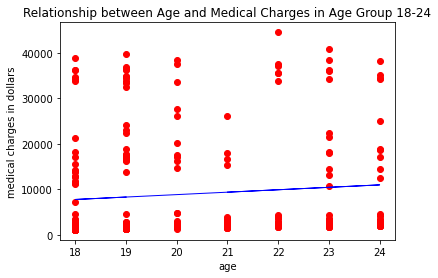

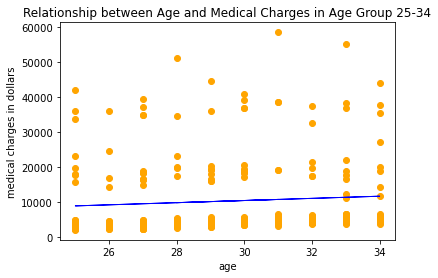

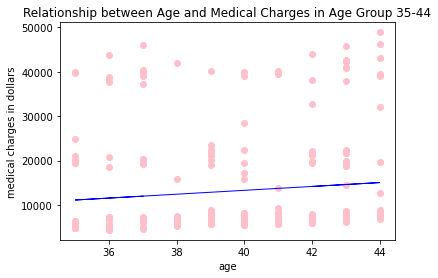

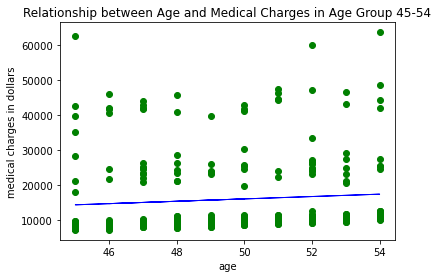

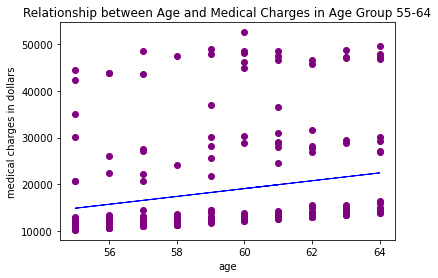

In [127]:
#CREATES SCATTER PLOT WITH REGRESSION LINE FOR AGES 18-24
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_18_24[["age"]]
Y = df_age_18_24[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges in Age Group 18-24")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()



#CREATES SCATTER PLOT WITH REGRESSION LINE FOR AGES 25-34
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_25_34[["age"]]
Y = df_age_25_34[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges in Age Group 25-34")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'orange')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()



#CREATES SCATTER PLOT WITH REGRESSION LINE FOR AGES 35-44
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_35_44[["age"]]
Y = df_age_35_44[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges in Age Group 35-44")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'pink')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()



#CREATES SCATTER PLOT WITH REGRESSION LINE FOR AGES 45-54
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_45_54[["age"]]
Y = df_age_45_54[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges in Age Group 45-54")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'green')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()



#CREATES SCATTER PLOT WITH REGRESSION LINE FOR AGES 55-64
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_55_64[["age"]]
Y = df_age_55_64[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges in Age Group 55-64")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'purple')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()

We can see that in all 5 of our graphs, there is some sort of positive linear trend. 



**Hypothesis Testing for Relationship between ages in Age Groups and Medical Charges**

Next, let's do some hypothesis testing on our dataframes to see if we can reject the null hypothesis of no relationship between ages within age groups and medical charges. 

**HYPOTHESIS TESTING FOR AGES 18-24**

In [128]:
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_18_24[["age"]]
Y = df_age_18_24[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)

0.12278995023071061


Here, we can see that the p-value is 0.12278995023071622. Since our p-value is **greater** than our significance level (0.05), we **do not reject** our null hypothesis. At a 0.05 significance level, there is insufficient evidence to support the claim that an increase in age in the age group (18-24) leads to an increase in medical charges. 

**HYPOTHESIS TESTING FOR AGES 25-34**

In [129]:
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_25_34[["age"]]
Y = df_age_25_34[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)


0.20499364780895946


Here, we can see that the p-value is 0.2049936478089516. Since our p-value is **greater** than our significance level (0.05), we again **do not reject** our null hypothesis. At a 0.05 significance level, there is insufficient evidence to support the claim that an increase in age in the age group (25-34) leads to an increase in medical charges.

**HYPOTHESIS TESTING FOR AGES 35-44**

In [130]:
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_35_44[["age"]]
Y = df_age_35_44[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)


0.08713794775164492


Here, we can see that the p-value is 0.08713794775164492. Since our p-value is **greater** than our significance level (0.05), we again **do not reject** our null hypothesis. At a 0.05 significance level, there is insufficient evidence to support the claim that an increase in age in the age group (35-44) leads to an increase in medical charges.

**HYPOTHESIS TESTING FOR AGES 45-54**

In [131]:
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_45_54[["age"]]
Y = df_age_45_54[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)


0.16045606344334046


Here, we can see that the p-value is 0.16045606344333574. Since our p-value is **greater** than our significance level (0.05), we again **do not reject** our null hypothesis. At a 0.05 significance level, there is insufficient evidence to support the claim that an increase in age in the age group (45-54) leads to an increase in medical charges.

**HYPOTHESIS TESTING FOR AGES 55-64**

In [132]:
#the X contains the values of the age column and the Y contains the values of the charges column 
X = df_age_55_64[["age"]]
Y = df_age_55_64[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)


0.0008515659180905003


Here, we can see that the p-value is 0.0008515659180905003. Since our p-value is **less** than our significance level (0.05), we **reject** our null hypothesis. At a 0.05 significance level, there is sufficient evidence to support the claim that an increase in age in the age group (55-64) leads to an increase in medical charges.


**1.2 Bar Graph of Age Groups vs Medical Charges**

To better visualize the comparison of medical charges between age groups, let's make a bar graph with averages of medical charges within each age group. 

First, we will find the average medical charge for each of the 5 age groups:


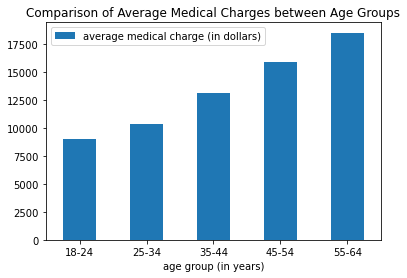

In [133]:
#calculates the average medical charge for the (18-24) age group 
avg_charge_18_24 = df_age_18_24["charges"].mean()

#calculates the average medical charge for the (25-34) age group 
avg_charge_25_34 = df_age_25_34["charges"].mean()

#calculates the average medical charge for the (35-44) age group 
avg_charge_35_44 = df_age_35_44["charges"].mean()

#calculates the average medical charge for the (45-54) age group 
avg_charge_45_54 = df_age_45_54["charges"].mean()

#calculates the average medical charge for the (55-64) age group 
avg_charge_55_64 = df_age_55_64["charges"].mean()


#creates a new dataframe to store the average medical charges for each age group
df_average_charges = pd.DataFrame()

df_average_charges['age group (in years)'] = ["18-24", "25-34", "35-44", "45-54", "55-64"]

df_average_charges['average medical charge (in dollars)'] = [avg_charge_18_24, avg_charge_25_34, avg_charge_35_44, avg_charge_45_54, avg_charge_55_64]

ax = df_average_charges.plot.bar(title = "Comparison of Average Medical Charges between Age Groups", x = 'age group (in years)', y = 'average medical charge (in dollars)', rot=0)



**1.3 Scatter Plot of Relationship between Age and Medical Charges for ALL AGES**

Now, we want to see what happens when we _combine_ our data for _all age groups_. Is there a definite relationship between age and medical charge? Let's find out... 

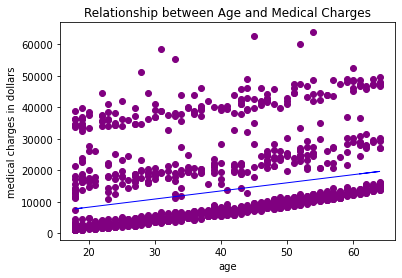

In [134]:
#CREATES SCATTER PLOT WITH REGRESSION LINE FOR ALL AGES

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["age"]]
Y = df[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Age and Medical Charges")
plt.xlabel("age")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'purple')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()


We some sort of positive trend between age and medical charges. Now let's run the hypothesis test...

In [135]:
#HYPOTHESIS TESTING FOR all ages 

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["age"]]
Y = df[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)

4.8866933317233075e-29


The p-value is 4.8866933317233075e-29, a very small number. Since our p-value is **less** than our significance level (0.05), we **reject** our null hypothesis of no relationship between age and medical charges. At a 0.05 significance level, there is sufficient evidence to support the claim that an increase in age leads to an increase in medical charges.

**2. Number of Children and Medical Charges**

**2.1 Relationship between Number of Children and Medical Charges**

Now, we want to explore whether the number of children an individual has may have an impact on medical charges. 

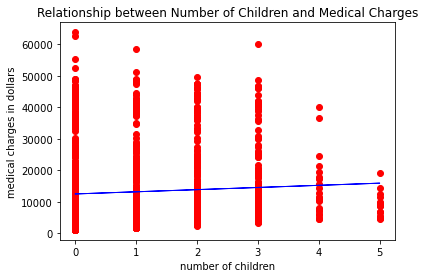

In [136]:
#CREATES SCATTER PLOT WITH REGRESSION LINE based on number of children

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["children"]]
Y = df[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between Number of Children and Medical Charges")
plt.xlabel("number of children")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()

There seems to be some sort of positive linear trend between number of children and medical charges. However, we must run a hypothesis test to confirm this...

In [137]:
#HYPOTHESIS TESTING FOR number of children 

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["children"]]
Y = df[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)

0.012852128520149083


Our p value of 0.012852128520149083 is less than our significance level of 0.05, indicating that **there is in fact a relationship between number of children and medical charges** 

**3. BMI and Medical Charges**

BMI is a measurement of an individual's weight (in kilograms) divided by the square of height (in meters). Hence, a **lower BMI** may indicate _low body fat_ and a **high BMI** may be an indicator of _high body fat_. 

According to the CDC, a BMI that is:
- _(< 18.5)_ may indicate that a person may be **underweight**
- _(18.5 to 24.9)_ is a good indicator of a **healthy weight** 
- _(25.0 to 29.9)_ may indicate that a person may be **overweight**
- _(>= 30)_ may indicate that a person may be **obese** 

https://www.cdc.gov/healthyweight/assessing/index.html




**3.1 Pie Chart of Average Medical Charges Based on BMI Category**

First, let's create a pie chart with the BMI's in our dataset:

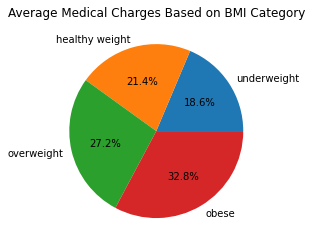

In [138]:
#to create a pie chart, we'll have to first organize our BMI data into 4 categories: 
#1)underweight 2)healthy weight 3)overweight 4)obese 

underweight_df = df[df.bmi < 18.5]
healthy_df = df[(df.bmi >= 18.5) & (df.bmi <= 24.9)]
overweight_df = df[(df.bmi >= 25) & (df.bmi <= 29.9)]
obese_df = df[df.bmi >= 30]

#Next, we will find the average medical charge for each BMI group

#calculates the average medical charge for the underweight BMI group 
avg_charge_underweight = df_age_18_24["charges"].mean()

#calculates the average medical charge for the healthy weight BMI group 
avg_charge_healthy_weight = df_age_25_34["charges"].mean()

#calculates the average medical charge for the overweight BMI group 
avg_charge_overweight = df_age_35_44["charges"].mean()

#calculates the average medical charge for the obese BMI group 
avg_charge_obese = df_age_45_54["charges"].mean()

#creates a new dataframe to store the average medical charges for each BMI group
df_average_charges_BMI = pd.DataFrame()

df_average_charges_BMI['BMI group'] = ["underweight", "healthy weight", "overweight", "obese"]

df_average_charges_BMI['average medical charge (in dollars)'] = [avg_charge_underweight, avg_charge_healthy_weight, avg_charge_overweight, avg_charge_obese] 

plt.pie(df_average_charges_BMI['average medical charge (in dollars)'], labels = df_average_charges_BMI['BMI group'], autopct='%1.1f%%')
plt.title("Average Medical Charges Based on BMI Category")
plt.show() 

The results of the pie chart indicate that individuals who are underweight are spending the least amount of money on medical charges and individuals who are obese are spending the most on medical charges. Does this tell us something about a possible relationship between BMI and medical charges? Let's explore some more. 

**3.2 Relationship between BMI and Medical Charges**

Let's graph a scatter plot with BMI against medical charges: 

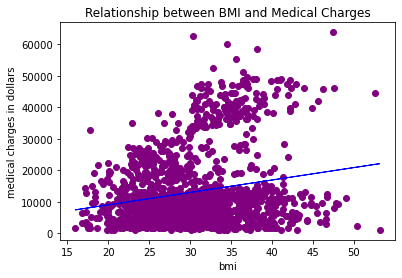

In [139]:
#CREATES SCATTER PLOT WITH REGRESSION LINE based on BMI

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["bmi"]]
Y = df[["charges"]]

#creates regression line for X and Y
regressor = LinearRegression().fit(X, Y)

#plots the values X and Y values, including the regression line
plt.title("Relationship between BMI and Medical Charges")
plt.xlabel("bmi")
plt.ylabel("medical charges in dollars")
plt.scatter(X, Y, color = 'purple')
plt.plot(X, regressor.predict(X), color = 'blue', linewidth = 1)
plt.show()

In [140]:
#HYPOTHESIS TESTING FOR BMI

#the X contains the values of the age column and the Y contains the values of the charges column 
X = df[["bmi"]]
Y = df[["charges"]]

regressor = LinearRegression().fit(X, Y) 

#extracts and prints the p value from the OLS regression results
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
p_value = (est.fit().f_pvalue)
print(p_value)

2.459085535118864e-13


Based on the results of our test, it seems that our p-value is 2.459085535118864e-13, a very small number. Hence, our null hypothesis is rejected, as the p-value is under the significance level of 0.05. Therefore, it is safe to conclude that **there is a positive relationship between BMI and medical charges**. 

**4. Smoking and Medical Charges**

In the smoker column of the dataframe, it is indicated whether or not that individual smokes by a yes or no. Next, we will be doing an analysis on the relationship between smoking and medical charges.

**4.1 Violin Plot of Medical Charges Based on Smoking**

First, we will be plotting the smoker column and the charges column to see if whether or not a primary beneficiary smokes affects their individual medical charges. Below, we have created a violin plot consisting of two violins (one for all the individual medical charges for primary beneficiaries that are smokers and another for all the individual medical charges for primary beneficiaries that are not smokers).

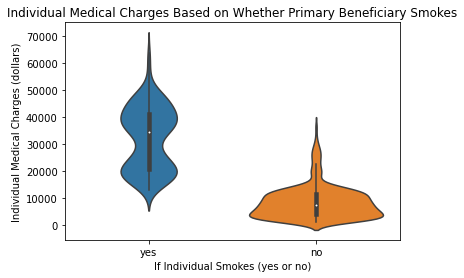

In [141]:
#CREATES VIOLIN PLOT FOR MEDICAL CHARGES OF SMOKERS AND NONSMOKERS
fig, ax = plt.subplots()

#plots the smoker and charges column to form two violins
sns.violinplot(x = 'smoker', y = 'charges', data = df)

#sets the title and labels the x and y axis
ax.set_xlabel("If Individual Smokes (yes or no)")
ax.set_ylabel("Individual Medical Charges (dollars)")
ax.set_title("Individual Medical Charges Based on Whether Primary Beneficiary Smokes")
fig.savefig("violin.png")

Our violin plot shows that primary beneficiaries who don't smoke tend to have lower individual medical charges overall compared to those who smoke. This is because the orange violin for nonsmokers is skewed and clusters toward lower individual medical charge values than the blue violin for smokers (which is more unimodal).

**4.2 Scatter Plots of Medical Charges Based on Age for Smokers VS Nonsmokers**

Next, we want to see how the relationship between age and individual medical charges differs for primary beneficiaries that smoke and those who don't smoke. To do this, we are going to filter the dataframe to only get the data for smokers. Then, we will create a scatter plot of age vs. individual medical charges for **smokers** to visualize this relationship. We will also add a regression line to the scatter plot to visualize the trend of the data.

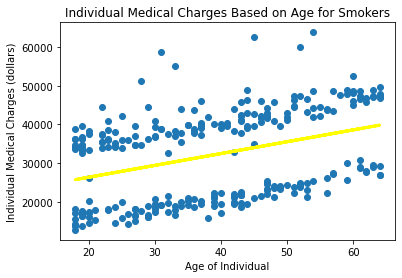

In [142]:
#creates a new dataframe to store the smoker data to plot
smokers_info_df = pd.DataFrame()

#creates a new array to store the medical charges for only smokers
medical_charges_for_smokers_array = []

#creates a new array to store the ages for only smokers
age_for_smokers_array = []

#iterates through the original dataframe and only adds the medical charge and age information for smokers to
#their corresponding arrays
for index, row in df.iterrows():
    if row['smoker'] == 'yes':
        medical_charges_for_smokers_array.append(row['charges'])
        age_for_smokers_array.append(row['age'])
        
#adds the age and medical charge arrays to the new dataframe
smokers_info_df['age'] = age_for_smokers_array
smokers_info_df['charges'] = medical_charges_for_smokers_array

#creates a regression object and fits it to the plot
X = smokers_info_df[['age']]
Y = smokers_info_df[['charges']]
regressor = LinearRegression().fit(X, Y)

#labels the scatter plot
plt.title("Individual Medical Charges Based on Age for Smokers")
plt.xlabel("Age of Individual")
plt.ylabel("Individual Medical Charges (dollars)")

#creates a scatter plot of smokers' ages VS smokers' medical charges
plt.scatter(age_for_smokers_array, medical_charges_for_smokers_array)
plt.plot(X, regressor.predict(X), color = 'yellow', linewidth = 3)
plt.show()

The regression line for scatter plot we created above shows a positive trend. Therefore, as age increases, an individual's medical charges increase for smokers. Next, we will create another scatter plot with a regression line. Except this time we will plot age vs. individual medical charges for **nonsmokers** so we can compare the two scatter plots

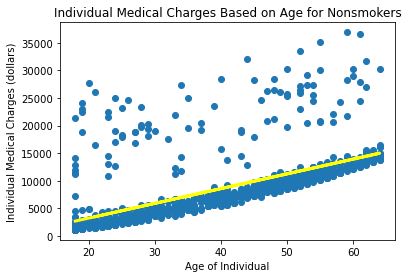

In [143]:
#creates a new dataframe to store the nonsmoker data to plot
nonsmokers_info_df = pd.DataFrame()

#creates a new array to store the medical charges for only nonsmokers
medical_charges_for_nonsmokers_array = []

#creates a new array to store the ages for only nonsmokers
age_for_nonsmokers_array = []

#iterates through the original dataframe and only adds the medical charge and age information for nonsmokers 
#to their corresponding arrays
for index, row in df.iterrows():
    if row['smoker'] == 'no':
        medical_charges_for_nonsmokers_array.append(row['charges'])
        age_for_nonsmokers_array.append(row['age'])

#adds the age and medical charge arrays to the new dataframe
nonsmokers_info_df['age'] = age_for_nonsmokers_array
nonsmokers_info_df['charges'] = medical_charges_for_nonsmokers_array

#creates a regression object and fits it to the plot
X = nonsmokers_info_df[['age']]
Y = nonsmokers_info_df[['charges']]
regressor = LinearRegression().fit(X, Y)

#labels the scatter plot
plt.title("Individual Medical Charges Based on Age for Nonsmokers")
plt.xlabel("Age of Individual")
plt.ylabel("Individual Medical Charges (dollars)")

#creates a scatter plot of nonsmokers' ages VS nonsmokers' medical charges and adds a regression line
plt.scatter(X, Y)
plt.plot(X, regressor.predict(X), color = 'yellow', linewidth = 3)
plt.show()

In both scatter plots the regression line has a positive trend. Therefore, it appears that overall as age increases, the individual medical charges increase. In other words, **generally, for smokers and nonsmokers, as age increases, their individual medical charges increase**

**5. Region and Medical Charges**

Next, we want to visualize how the primary beneficiary's residential region affects their individual medical charges. In other words, is there a relationship between where the primary beneficiary resides and what their medical charges are?

**5.1 Pie Chart of Medical Charges Based on Region**

We need to create a pie chart to see what proportion of the total medical charges each region accounts for. To create this pie chart, first we have to calculate the total medical charges for each region. Then, we have to store the total charges for each region in a new dataframe.

In [144]:
#created a dictionary to store all the possible region values and set the total charge values to a default 0
dict = {'region': ["northeast", "northwest", "southwest", "southeast"], 
        'total_charges': [0, 0, 0, 0]}

#creates a new dataframe with two columns (region and total charges)
new_df = pd.DataFrame(dict)

#iterates through the original dataframe
for index, row in df.iterrows():
    
    #if the region of the current individual at this row is northeast updates the charge value
    if row['region'] == 'northeast':
        new_df.loc[0, 'total_charges'] = new_df.loc[0, 'total_charges'] + row['charges'] 
    
    #if the region of the current individual at this row is northwest updates the charge value
    elif row['region'] == 'northwest':
        new_df.loc[1, 'total_charges'] = new_df.loc[1, 'total_charges'] + row['charges']
    
    #if the region of the current individual at this row is southwest updates the charge value
    elif row['region'] == 'southwest':
        new_df.loc[2, 'total_charges'] = new_df.loc[2, 'total_charges'] + row['charges']
    
    #if the region of the current individual at this row is southeast updates the charge value
    else:
        new_df.loc[3, 'total_charges'] = new_df.loc[3, 'total_charges'] + row['charges']

#prints new dataframe with total medical charges for each region
new_df

,region,total_charges
0,northeast,4.343669e+06
1,northwest,4.035712e+06
2,southwest,4.012755e+06
3,southeast,5.363690e+06


Lastly, we will create a pie chart using the two columns from the new dataframe (region and total_charges). We can use this pie chart to see what proportion of the total medical charges each region accounts for.

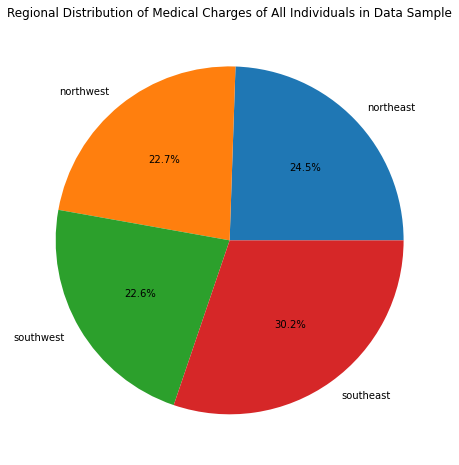

In [145]:
plt.figure(figsize = (8,8))
plt.title('Regional Distribution of Medical Charges of All Individuals in Data Sample')

#plots a pie chart with 4 sections (percentage of total medical charges for northwest, northeast, southeast 
#and southwest regions)
plt.pie(new_df.total_charges, labels = new_df.region, autopct ='%1.1f%%')
plt.show()

The pie chart above shows what percentage of the total medical charges are from a particular region. This pie chart suggests that people from the southeast are spending proportionally more on medical charges than people from the other regions. However, people from the northwest, northeast and southwest are spending similar amounts on medical charges.

**6. Application of Machine Learning Algorithms**

Now that we have finished preprocessing, visualizing and conducting hypothesis tests on our dataset, we will execute machine learning algorithms. The main purpose of machine learning is to make data predictions based on the dataset we already have. In the next few steps, we will perform regression using a decision tree and linear regression using OLS.

**6.1 Regression Using a Decision Tree**

First, we have to create a copy of the dataframe and then convert all the non-numerical values to numerical values. Then, we can execute regression using a decision tree and get the prediction accuracy rate of our algorithm for this dataset.

In [146]:
#creates a new dataframe that is a copy of the original dataframe called new_df
new_df = df.copy()

#drops the age category column because it is redundant since there is already an age column and isn't
#necessary for decision tree regression
new_df = new_df.drop(columns = ['age_category'])

#converts non-numerical smoker data to numerical data
nonnumerical_smoker_data = pd.get_dummies(df['smoker'], drop_first = True)
new_df['smoker'] = nonnumerical_smoker_data

#converts non-numerical sex data to numerical data
nonnumerical_sex_data = pd.get_dummies(df['sex'], drop_first = True)
new_df['sex'] = nonnumerical_sex_data

#converts non-numerical region data to numerical data
for index, row in df.iterrows():
    if row['region'] == 'northeast':
        new_df.loc[index, 'region'] = 0
    elif row['region'] == 'northwest':
        new_df.loc[index, 'region'] = 1
    elif row['region'] == 'southeast':
        new_df.loc[index, 'region'] = 2
    else:
        new_df.loc[index, 'region'] = 3

#converts floating point charges data to integer values
new_df['charges'] = preprocessing.LabelEncoder().fit_transform(new_df['charges'])

#splits the dataframe into features and a target variable
Y = new_df['charges']
X = new_df.drop('charges', axis = 1)

#splits the dataset into a training set (contains 60 percent of data) and a
# holdout/validation set (contains 40 percent of data)
training_set_X, testing_set_X, training_set_Y, testing_set_Y = train_test_split(X, Y, test_size = 0.4, random_state = 1)

#creates a decision tree regressor object and fits the decision tree to the training data set
#and sets the decision tree model's maximum depth to 3
clf = DecisionTreeRegressor(max_depth = 3)
clf = clf.fit(training_set_X, training_set_Y)

#evaluates the algorithm on the holdout/validation set and prints accuracy of decision tree algorithm
testing_data_accuracy = clf.score(testing_set_X, testing_set_Y)

print("Accuracy rate for testing data is: ")
print(testing_data_accuracy)

Accuracy rate for testing data is: 
0.7798880402347346


By completing regression using a decision tree we found that the accuracy rate for the testing data is about 0.779. This is a relatively high accuracy rate which means that regression using a decision tree is relatively accurate at predicting data.

**6.2 Linear Regression Using OLS**